# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('b1abb33c4f.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [56]:
df.shape

(27028, 69)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

(0.0, 1.0, 0.0, 1.0)

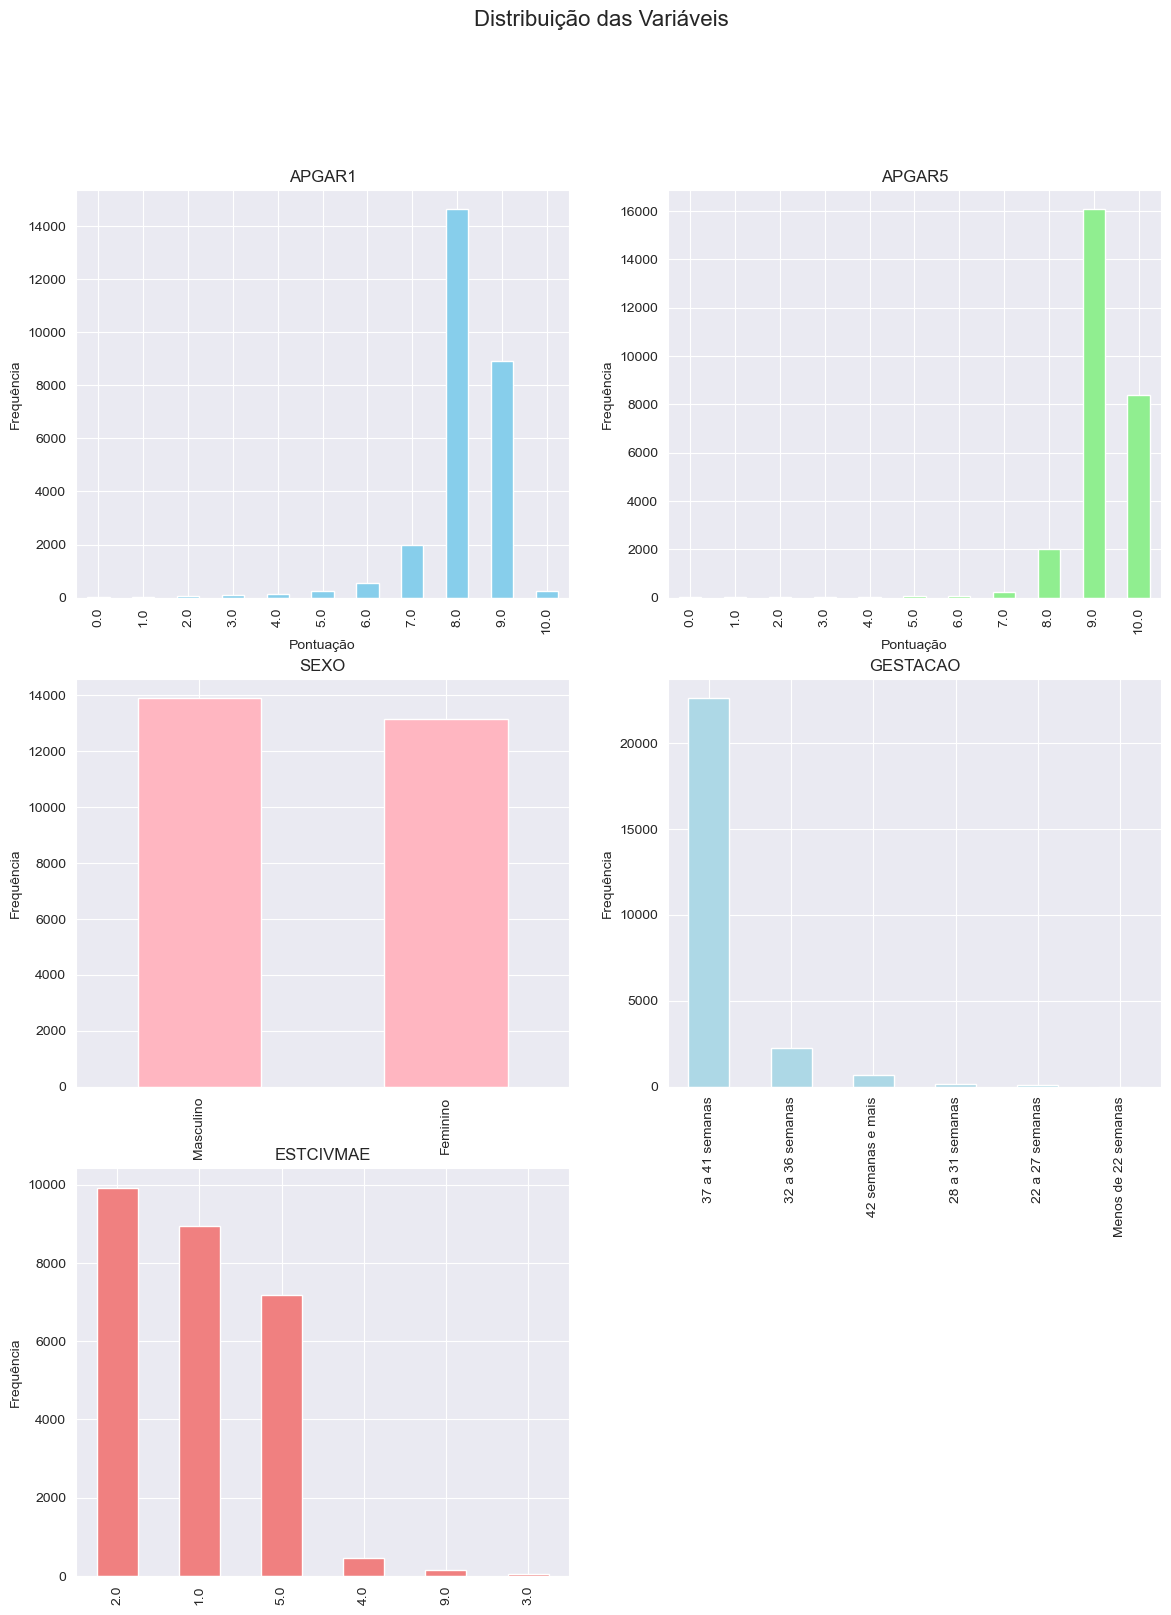

In [58]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Distribuição das Variáveis', fontsize=16)

# Para APGAR1 e APGAR5, vamos usar histogramas, pois são variáveis contínuas
df['APGAR1'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('APGAR1')
axes[0, 0].set_xlabel('Pontuação')
axes[0, 0].set_ylabel('Frequência')

df['APGAR5'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('APGAR5')
axes[0, 1].set_xlabel('Pontuação')
axes[0, 1].set_ylabel('Frequência')

# Para SEXO, GESTACAO, e ESTCIVMAE, que são categóricas, usaremos gráficos de barras diretamente
df['SEXO'].value_counts().plot(kind='bar', ax=axes[1, 0], color='lightpink')
axes[1, 0].set_title('SEXO')
axes[1, 0].set_ylabel('Frequência')

df['GESTACAO'].value_counts().plot(kind='bar', ax=axes[1, 1], color='lightblue')
axes[1, 1].set_title('GESTACAO')
axes[1, 1].set_ylabel('Frequência')

df['ESTCIVMAE'].value_counts().plot(kind='bar', ax=axes[2, 0], color='lightcoral')
axes[2, 0].set_title('ESTCIVMAE')
axes[2, 0].set_ylabel('Frequência')

# Removendo o espaço vazio extra
axes[2, 1].axis('off')

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

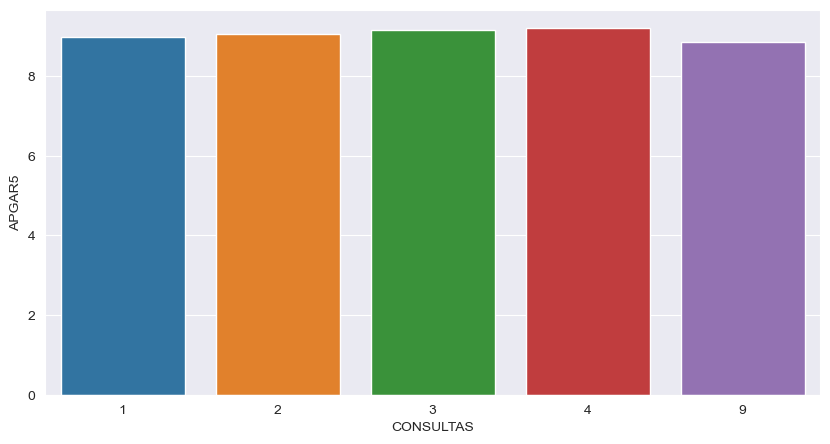

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x='CONSULTAS', y='APGAR5', data=df, estimator=np.mean, errorbar=None)
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

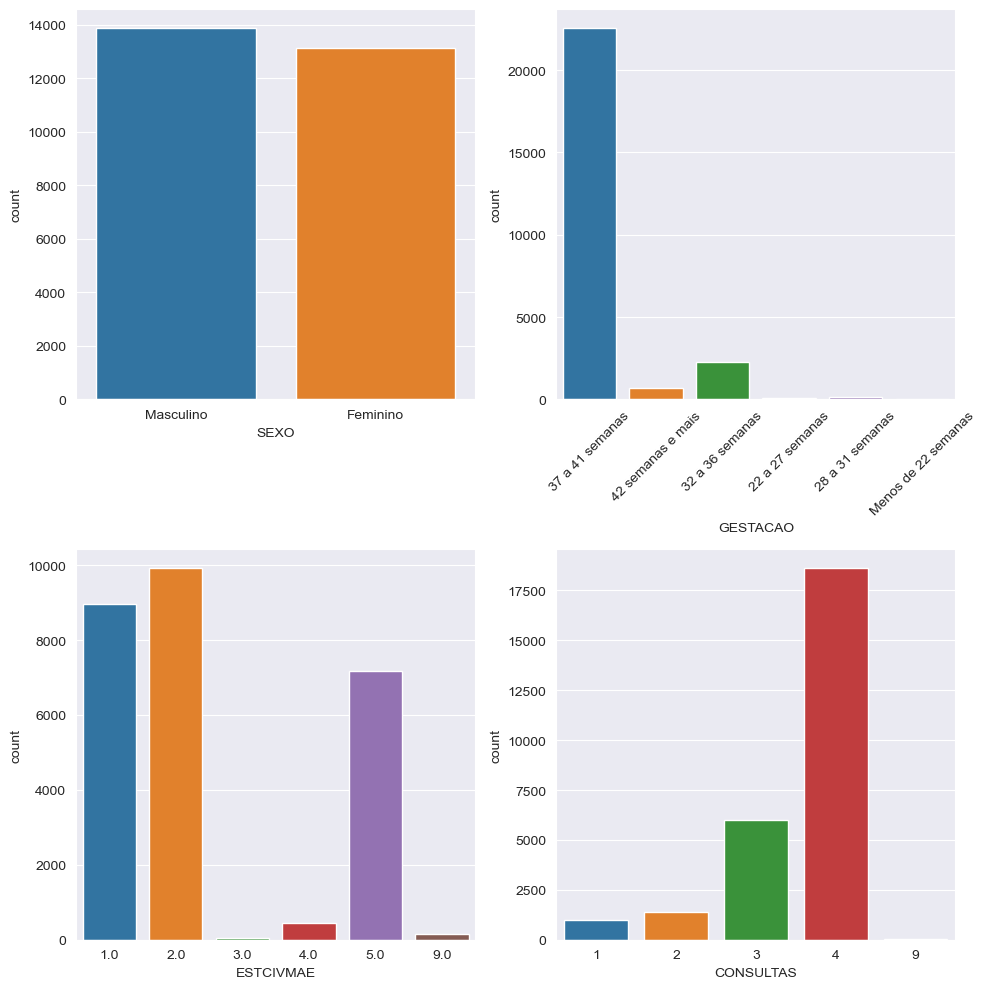

In [60]:
fig, ax = plt.subplots(2,2, figsize=(10,10))    
sns.countplot(ax= ax[0,0], x='SEXO', data=df)   
sns.countplot(ax= ax[0,1], x='GESTACAO', data=df)
ax[0,1].tick_params(axis='x', rotation=45)
sns.countplot(ax= ax[1,0], x='ESTCIVMAE', data=df)
sns.countplot(ax= ax[1,1], x='CONSULTAS', data=df)  
plt.tight_layout()
plt.show()  